In [23]:
#importing libraries
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
plt.style.use('fivethirtyeight')

In [4]:
#Reading data
url="http://bit.ly/w-data"
dt=pd.read_csv(url)
print("Data imported successfully")
dt.head(30)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
dt.shape

(25, 2)

In [12]:
dt.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


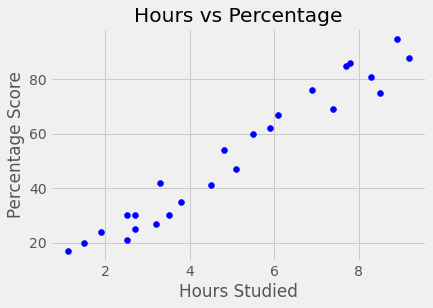

In [38]:
#Plotting the distribution of scores
plt.scatter(dt.Hours, dt.Scores, color="b") 
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [39]:
x = dt.iloc[:, :-1].values
y = dt.iloc[:, 1].values


In [40]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(x_train, y_train) 

print("Training complete.")

Training complete.


In [42]:
print(x_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]


In [43]:
print(y_train)

[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


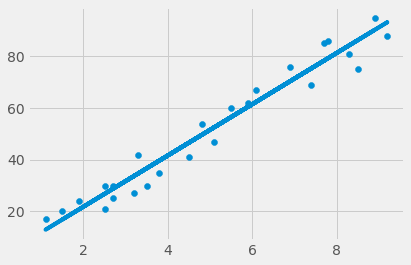

In [46]:
line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

In [47]:
print('Intercept:')
print(reg.intercept_)

Intercept:
2.018160041434683


In [48]:
print('Coefficient:')
print(reg.coef_)

Coefficient:
[9.91065648]


In [50]:
print(x_test) 
predy = reg.predict(x_test) 
predy

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [53]:
dt = pd.DataFrame({'Actual': y_test, 'Predicted': predy})  
print(dt)

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


In [54]:
print('Training score')
print(reg.score(x_train,y_train))
print('Test score')
print(reg.score(x_test,y_test))

Training score
0.9515510725211552
Test score
0.9454906892105356


In [55]:
from sklearn import metrics
metrics.r2_score(y_test,predy)


0.9454906892105356

In [56]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, predy))

Mean Absolute Error: 4.183859899002975


In [58]:
print('No of hours=',9.25)
y1_pred=reg.predict([[9.25]])
print('predicted score :',y1_pred)

No of hours= 9.25
predicted score : [93.69173249]
